# Project: Wrangle and Analyze Data (WeRateDogs)


## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#gathering">2. Gathering</a></li>
<li><a href="#assessing">3. Assessing</a></li>
<li><a href="#cleaning">4. Cleaning</a></li>
<li><a href="#visualization">5. Analysis and Visualization</a></li>

</ul>

<a id='intro'></a>

In this project, I will wrangle **WeRateDogs** Twitter data to create interesting and trustworthy analyses and visualizations. Since the Twitter archive only contains very basic tweet information, I will additionaly gather data using Tweeter API and combine with the WeRateDogs Twitter data. The combined data will be also assessed and cleaned to get insightful analyses and visualizations. 

### Data 
#### WeRateDog Twitter Archive 

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).


#### Additional Data via the Twitter API

Retweet count and favorite count are very important information but these values are omitted. So I will gather these information through Twitter's API for all 5000+ tweet IDs within the enhanced tweetter archive file. 

#### Twitter Image Predictions File
This file contains the dog breed classification results from a Nuerual Network model for every images in the WeRateDogs Twitter archive. This file has a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)


<a id='gathering'></a>
## 2. Gathering

In this part we gather data for this project.
1. The **WeRateDogs Twitter Archive** data is saved as the `twitter_archive_enhanced.csv` file.
2. **Twitter image prediction file** `image_predictions.tsv` is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv 
3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. 
Using the tweet IDs in the WeRateDogs Twitter archive, I will **query the Twitter API** for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data will be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 


### 2.1 Gather & Check WeRateDogs Twitter Archive file


In [1001]:
#!pip install tweepy

In [1294]:
#Import required libraries
import requests
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [1295]:
#Read file and display first few lines
df=pd.read_csv("twitter-archive-enhanced.csv")
df.head()
#df.shape

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1296]:
#Check number of rows and null values, types etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2.2 Download Twitter Image Predictions File and 

In [1005]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#print(response.content)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

image_pred=pd.read_csv("image-predictions.tsv",sep='\t')
image_pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1006]:
#Check number of rows and null values, types etc.
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 2.3 Crawl Twitter data 

In [33]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Fail
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809:

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [82]:
#Check out failed queries.
for key in fails_dict.keys():
    print(key, fails_dict[key])
len(fails_dict)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 [{'code': 144, 'message': 'No sta

27

In [69]:
#Retry crawling for two tweet ids which were occured for connection errors. 
#Other errors represent that ID is no longer exist or I have no permission.

failure_ids=[758740312047005698,676957860086095872]
retry_fails_dict={}
with open('tweet_json.txt', 'a') as outfile:
    for tweet_id in failure_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            retry_fails_dict[tweet_id] = e
            pass
print(fails_dict)

2357: 771004394259247104
Fail
2358: 758740312047005698
Success
2359: 676957860086095872
Success
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 

In [1007]:
tweet_json = []
# read in the json file line by line into a list
with open("tweet_json.txt") as file:
    for line in file:
        tweet_json.append(json.loads(line))

In [1008]:
tweet_json[19]

{'created_at': 'Thu Jul 20 16:49:33 +0000 2017',
 'id': 888078434458587136,
 'id_str': '888078434458587136',
 'full_text': "This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway https://t.co/DK7iDPfuRX",
 'truncated': False,
 'display_text_range': [0, 127],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 888078426338406400,
    'id_str': '888078426338406400',
    'indices': [128, 151],
    'media_url': 'http://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg',
    'url': 'https://t.co/DK7iDPfuRX',
    'display_url': 'pic.twitter.com/DK7iDPfuRX',
    'expanded_url': 'https://twitter.com/dog_rates/status/888078434458587136/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 964, 'h': 1200, 'resize': 'fit'},
     'large': {'w': 1285, 'h

In [1009]:
# create a data frame containing the relevant api data
api_data = pd.DataFrame({'tweet_id': [i["id_str"] for i in tweet_json], 
     'retweet_count': [i["retweet_count"] for i in tweet_json], 
     'favorite_count': [i["favorite_count"] for i in tweet_json], 
     'retweet_count' : [i["retweet_count"] for i in tweet_json],
     'retweeted' : [i["retweeted"] for i in tweet_json],
     'followers_count': [i["user"]["followers_count"] for i in tweet_json], 
     'friends_count' :[i['user']['friends_count'] for i in tweet_json]               
     })
api_data.to_csv('api_data.csv')

In [1010]:
api_data.head()

,tweet_id,retweet_count,favorite_count,retweeted,followers_count,friends_count
0,892420643555336193,7366,35021,False,8969230,17
1,892177421306343426,5491,30334,False,8969230,17
2,891815181378084864,3630,22802,False,8969230,17
3,891689557279858688,7535,38268,False,8969230,17
4,891327558926688256,8133,36546,False,8969230,17


In [ ]:
api_data.info()

<a id='assessing'></a>
## 3. Assessing

### 3.1 Visual Assessment

I used Jupyter notebook and other tools(spreadsheet) to invistigate data. 

In [1736]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [1737]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [1738]:
api_data

,tweet_id,retweet_count,favorite_count,retweeted,followers_count,friends_count
0,892420643555336193,7366,35021,False,8969230,17
1,892177421306343426,5491,30334,False,8969230,17
2,891815181378084864,3630,22802,False,8969230,17
3,891689557279858688,7535,38268,False,8969230,17
4,891327558926688256,8133,36546,False,8969230,17
...,...,...,...,...,...,...
2326,666033412701032449,39,107,False,8969241,17
2327,666029285002620928,41,118,False,8969241,17
2328,666020888022790149,443,2343,False,8969241,17
2329,758740312047005698,1565,5586,False,8969598,17


### 3.2 Programmatic assessment
Pandas functions and/or methods are used to assess the data.

In [1739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1740]:
sum(df['tweet_id'].duplicated())

0

In [1741]:
df[df['in_reply_to_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [1742]:
df[df['retweeted_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [1743]:
numerator_count=df.rating_numerator.value_counts()
numerator_unique_values=numerator_count.index.unique()
numerator_unique_values

index_list=[]
for i in numerator_unique_values:
    if i >15:
        l=df[df['rating_numerator']==i].index
        #print(str(list(l)))
        index_list.append(list(l))
print(index_list)

[[188, 2074], [340, 695], [1254], [1663], [516], [1712], [1433], [1202], [1351], [902], [433], [1843], [1779], [290], [1634], [189], [313], [979], [55], [763], [1274], [1228], [1635], [1120]]


In [1744]:
for i in index_list:
    for j in i:
        print(j,df.rating_numerator[j], df.text[j])

188 420 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074 420 After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
340 75 RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695 75 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
1254 80 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1663 20 I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
516 24 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1712 26 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10

In [1745]:
denom_count=df.rating_denominator.value_counts()
denom_count

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [1746]:
unique_values=denom_count.index.unique()
unique_values

Int64Index([10, 11, 50, 80, 20, 2, 16, 40, 70, 15, 90, 110, 120, 130, 150, 170,
            7, 0],
           dtype='int64')

In [1747]:
index_list=[]
for i in range(1,len(unique_values)):
    l=df[df['rating_denominator']==unique_values[i]].index
    index_list.append(list(l))
print(index_list)

[[784, 1068, 1662], [1202, 1274, 1351], [1254, 1843], [1165, 1598], [2335], [1663], [1433], [433], [342], [1228], [1635], [1779], [1634], [902], [1120], [516], [313]]


In [1748]:
for i in index_list:
    for j in i:
        print(j,df.tweet_id[j],df.rating_denominator[j], df.text[j])

784 775096608509886464 11 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068 740373189193256964 11 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662 682962037429899265 11 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
1202 716439118184652801 50 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1274 709198395643068416 50 From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1351 704054845121142784 50 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
1254 710658690886586372 80 Here's a brigade of puppers. All look very p

In [1749]:
df.loc[342]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                               8.32088e+17
in_reply_to_user_id                                                 3.05821e+07
timestamp                                             2017-02-16 04:45:50 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

In [1751]:
#check out doggo,floofer,pupper, puppor labeled columns
print(df['doggo'].value_counts()['doggo'])
print(df['floofer'].value_counts()['floofer'])
print(df['pupper'].value_counts()['pupper'])
print(df['puppo'].value_counts()['puppo'])
df.query('doggo=="doggo" or floofer=="floofer"or pupper=="pupper"or puppo=="puppo"')[['doggo','floofer','pupper','puppo']]

97
10
257
30


,doggo,floofer,pupper,puppo
9,doggo,None,None,None
12,None,None,None,puppo
14,None,None,None,puppo
29,None,None,pupper,None
43,doggo,None,None,None
...,...,...,...,...
1995,None,None,pupper,None
2002,None,None,pupper,None
2009,None,None,pupper,None
2015,None,None,pupper,None


In [1675]:
df.query('doggo=="doggo" & pupper=="pupper"').expanded_urls

460     https://twitter.com/dog_rates/status/817777686...
531     https://twitter.com/dog_rates/status/808106460...
565     https://twitter.com/dog_rates/status/802265048...
575     https://twitter.com/dog_rates/status/801115127...
705     https://twitter.com/dog_rates/status/785639753...
733                         https://vine.co/v/5rgu2Law2ut
778     https://twitter.com/dog_rates/status/733109485...
822     https://twitter.com/dog_rates/status/741067306...
889     https://twitter.com/dog_rates/status/759793422...
956     https://twitter.com/dog_rates/status/751583847...
1063    https://twitter.com/dog_rates/status/741067306...
1113    https://twitter.com/dog_rates/status/733109485...
Name: expanded_urls, dtype: object

In [1676]:
df.expanded_urls[778]
##There are multiple dog stage lables since there are multiple dogs in a picture.

'https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1'

<img src="https://pbs.twimg.com/media/CiyHLocU4AI2pJu?format=jpg&name=900x900">


In [1677]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1678]:
sum(image_pred['tweet_id'].duplicated())

0

In [1679]:
sum(image_pred['jpg_url'].duplicated())

66

In [1680]:
#image_pred[image_pred['jpg_url'].duplicated(keep=False)==True]
pd.concat(g for _, g in image_pred.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [1681]:
sum(image_pred['tweet_id'].isnull())

0

In [1682]:
print(image_pred.query('p1_dog==True').p1.unique())
print(image_pred.query('p2_dog==True').p2.unique())
print(image_pred.query('p3_dog==True').p3.unique())

['Welsh_springer_spaniel' 'redbone' 'German_shepherd'
 'Rhodesian_ridgeback' 'miniature_pinscher' 'Bernese_mountain_dog' 'chow'
 'miniature_poodle' 'golden_retriever' 'Gordon_setter' 'Walker_hound'
 'pug' 'bloodhound' 'Lhasa' 'English_setter' 'Italian_greyhound'
 'Maltese_dog' 'malamute' 'soft-coated_wheaten_terrier' 'Chihuahua'
 'black-and-tan_coonhound' 'toy_terrier' 'Blenheim_spaniel' 'Pembroke'
 'Chesapeake_Bay_retriever' 'curly-coated_retriever' 'dalmatian'
 'Ibizan_hound' 'Border_collie' 'Labrador_retriever' 'miniature_schnauzer'
 'Airedale' 'West_Highland_white_terrier' 'toy_poodle' 'giant_schnauzer'
 'vizsla' 'Rottweiler' 'Siberian_husky' 'papillon' 'Saint_Bernard'
 'Tibetan_terrier' 'borzoi' 'beagle' 'Yorkshire_terrier' 'Pomeranian'
 'kuvasz' 'flat-coated_retriever' 'Norwegian_elkhound' 'standard_poodle'
 'Staffordshire_bullterrier' 'basenji' 'Lakeland_terrier'
 'American_Staffordshire_terrier' 'Shih-Tzu' 'French_bulldog' 'Pekinese'
 'komondor' 'malinois' 'kelpie' 'Brittany_sp

In [1683]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   object
 1   retweet_count    2331 non-null   int64 
 2   favorite_count   2331 non-null   int64 
 3   retweeted        2331 non-null   bool  
 4   followers_count  2331 non-null   int64 
 5   friends_count    2331 non-null   int64 
dtypes: bool(1), int64(4), object(1)
memory usage: 93.5+ KB


In [1684]:
api_data.friends_count.nunique()
##friends column are not required

1

In [1685]:
api_data.followers_count.value_counts()

8969230    507
8969240    357
8969241    348
8969231    208
8969239    177
8969229    156
8969242    155
8969235    123
8969237    100
8969233     58
8969236     40
8969238     38
8969234     33
8968655      6
8969243      6
8968656      4
8968654      3
8968645      3
8969598      2
8968652      2
8968644      2
8968646      1
8968650      1
8968657      1
Name: followers_count, dtype: int64

### 3.3 Observations

**WeRateDogs Twitter Archive**

- **doggo, floofer,pupper,puppo** columns are not True/False values. Actual doggo, floofer, pupper, puppo stage names are exist.
- Multiple labeling for dog stages since there are multiple dogs in a picture.So these colums need to be kept.
- Retweets are may not be used for analysis.
- **retweeted_status_id,retweeted_status_user_id,in_reply_to_status_id,in_reply_to_user_id**s non null values are float values.
- Wiered ratings observed in **rating_numerator & ratings_denominator**: 
    + No clues for actual ratings (666/10, 182/10, 1776/10, All time 24/7, Date 11/15/15, 20/10, snoop dog 420/10, 4/20(tweet id: 686035780142297088))
    + Only part of decimal numbers were extracted for numerator(11.27/10, 9.75/10, 11.26/10)
    + Ratings for Multiple dogs in a image get aggreated ratings (44/40,50/50, 165/150, 84/70,88/80, 144/120,143/130,45/50,99/90, 121/110, 204/170) 
    + Extracted duplicated OO/OO format in text column (Current value --> Updated value) 
      (Event 9/11--> 14/10,Size3 1/2 legged --> 9/10, 50/50 --> 11/10, 17/10 --> 13/10, 960/00 -->13/10, 4/20 --> 13/10)

    

**Image_prediction**
- Duplicated image predictions (66 duplicates)
- Images with multiple dogs 

**API DATA**
- **friend count** is not real data (Twitter limitation)



<a id='clean'></a>
## 4. Clean

This section consists of the cleaning portion of the data wrangling process:

* Quality Issues:
### Quality Issues:
 Completeness, validity, accuracy, consistency (content issues)*

 + 4.1 Tiwtter_Archive: Delete Retweets
 + 4.2 Twitter_Archive: Drop columns that are not used
 + 4.3 Twitter_Archive: Create a stage column that represent dog's stage from doggo,pupper,floofer,puppo columns
 + 4.4 Twitter_Archive: Drop doggo,pupper,floofer,puppo columns
 + 4.5 Twitter_Archive: Correct values of ratings_numberator & ratings_denominator
  + 4.5.1 Delete uncorrect ratings which I cannot get clue for actual values.
  + 4.5.2 Update miscaptured rating values with actual ratings
  + 4.5.3 Change ratings columns to float values types and correct numerator values with decial point
  + 4.5.4 Change aggregated ratings for multiple dos in a single images
 + 4.6 Image_Prediction: Drop duplicated Image prediction based on url
 + 4.7 Image_prediction: Create 1 column for image prediction and 1 column for confidence level
 + 4.8 Image_prediction:  Delete columns that are not used
 + 4.9 API-DATA: Drop Friends_count, retweeted column
 + 4.11 Twitter Archive, Image_prediction: Change type for tweet_id


 
### Tidiness Issues:

 + 4.10 Twitter_archive: Create Year, Month, Day colums from timestamp
 + 4.12 Merge dataframes and store merged dataframe


In [2009]:
# Make a copy of the tables before cleaning
df_clean = df.copy()
image_pred_clean = image_pred.copy()
api_data_clean = api_data.copy()

### 4.1 Tiwtter_Archive: Delete Retweets

In [2010]:
#Code: delete retweeted code
df_clean = df_clean[pd.isnull(df_clean['retweeted_status_user_id'])]

#TEST
print(sum(df_clean.retweeted_status_user_id.value_counts()))

0


### 4.2 Twitter_Archive: Drop columns that are not used

In [2011]:
##check columns
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [2012]:
#Code
df_clean = df_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','source',
                           'retweeted_status_id','retweeted_status_user_id', 
                            'retweeted_status_timestamp', 'expanded_urls'])                                                   

In [2013]:
#Test
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 4.3 Twitter_Archive: Create a stage column that represent dog's stage from doggo,pupper,floofer,puppo columns

In [2014]:
#Check duplicated labeling
print(df_clean['doggo'].value_counts()['doggo'])
print(df_clean['floofer'].value_counts()['floofer'])
print(df_clean['pupper'].value_counts()['pupper'])
print(df_clean['puppo'].value_counts()['puppo'])
print(df_clean.query("pupper=='pupper' and doggo=='doggo'")['doggo'].count())
print(df_clean.query("puppo=='puppo' and doggo=='doggo'")['doggo'].count())
print(df_clean.query("floofer=='floofer' and doggo=='doggo'")['doggo'].count())
print(df_clean.query("pupper=='pupper' and puppo=='puppo'")['puppo'].count())
print(df_clean.query("floofer=='floofer' and puppo=='puppo'")['puppo'].count())
print(df_clean.query("floofer=='floofer' and pupper=='pupper'")['pupper'].count())
print(df_clean.query("pupper=='pupper' and doggo=='doggo' and floofer=='floofer'")['doggo'].count())
print(df_clean.query("pupper=='pupper' and doggo=='doggo' and puppo=='puppo'")['doggo'].count())
print(df_clean.query("floofer=='floofer' and doggo=='doggo' and puppo=='puppo'")['doggo'].count())
print(df_clean.query("pupper=='pupper' and floofer=='floofer' and puppo=='puppo'")['puppo'].count())

87
10
234
25
10
1
1
0
0
0
0
0
0
0


In [2015]:
#Code
##Suggestion from the first review

# First replace None in stage columns with empty string as follows.
df_clean.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)
# Then combine stage columns.
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

'''
#Code: 1 for values exist, 0 for None
df_clean.loc[df_clean.doggo=="doggo",'doggo']=1
df_clean.loc[df_clean.doggo=="None",'doggo']=0
df_clean.loc[df_clean.floofer=="floofer",'floofer']=1
df_clean.loc[df_clean.floofer=="None",'floofer']=0
df_clean.loc[df_clean.pupper=="pupper",'pupper']=1
df_clean.loc[df_clean.pupper=="None",'pupper']=0
df_clean.loc[df_clean.puppo=="puppo",'puppo']=1
df_clean.loc[df_clean.puppo=="None",'puppo']=0
'''

'\n#Code: 1 for values exist, 0 for None\ndf_clean.loc[df_clean.doggo=="doggo",\'doggo\']=1\ndf_clean.loc[df_clean.doggo=="None",\'doggo\']=0\ndf_clean.loc[df_clean.floofer=="floofer",\'floofer\']=1\ndf_clean.loc[df_clean.floofer=="None",\'floofer\']=0\ndf_clean.loc[df_clean.pupper=="pupper",\'pupper\']=1\ndf_clean.loc[df_clean.pupper=="None",\'pupper\']=0\ndf_clean.loc[df_clean.puppo=="puppo",\'puppo\']=1\ndf_clean.loc[df_clean.puppo=="None",\'puppo\']=0\n'

In [2016]:
#TEST
df_clean.groupby('stage')['stage'].count()

stage
                 1831
doggo              75
doggo,floofer       1
doggo,pupper       10
doggo,puppo         1
floofer             9
pupper            224
puppo              24
Name: stage, dtype: int64

### 4.4 Twitter_Archive: Drop doggo,pupper,floofer,puppo columns

In [2017]:
#Check
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'stage'],
      dtype='object')

In [2018]:
#Code
df_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

In [2019]:
#Test
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

### 4.5 Twitter_Archive: Correct values of ratings_numberator & ratings_denominator

### 4.5.1 Delete uncorrect ratings which I cannot get clue for actual values. 
- No clues for actual ratings 
+ 666/10
+ 182/10
+ 1776/10 
+ All time 24/7
+ Date 11/15/15
+ 20/10
+ snoop dog 420/10
+ 4/20(tweet id: 686035780142297088))

In [2020]:
#Code: Check number of rows before deleting rows
print("# of Rows before drop:",df_clean.shape[0])
#Code: Check index with above values
with pd.option_context('max_colwidth', 200):
    print(df_clean.text[df_clean.query('rating_numerator==666 and rating_denominator==10').index[0]])
    print(df_clean.text[df_clean.query('rating_numerator==182 and rating_denominator==10').index[0]])
    print(df_clean.text[df_clean.query('rating_numerator==1776 and rating_denominator==10').index[0]])
    print(df_clean.text[df_clean.query('rating_numerator==24 and rating_denominator==7').index[0]])
    print(df_clean.text[df_clean.query('rating_numerator==11 and rating_denominator==15').index[0]])
    print(df_clean.text[df_clean.query('rating_numerator==20 and rating_denominator==16').index[0]])
    print(df_clean.text[df_clean.query('rating_numerator==420 and rating_denominator==10').index[0]])
    print(df_clean.text[df_clean.query('rating_numerator==420 and rating_denominator==10').index[1]])
    print(df_clean.text[df_clean.query('tweet_id==686035780142297088').index[0]])

# of Rows before drop: 2175
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@markhoppus 182/10
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
@docmisterio account started on 11/15/15
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating


In [2021]:
#Code: delete rows with wired values 
df_clean.drop(df_clean.query('rating_numerator==666 and rating_denominator==10').index[0],inplace=True)
df_clean.drop(df_clean.query('rating_numerator==182 and rating_denominator==10').index[0], inplace=True)
df_clean.drop(df_clean.query('rating_numerator==1776 and rating_denominator==10').index[0],inplace=True)
df_clean.drop(df_clean.query('rating_numerator==24 and rating_denominator==7').index[0],inplace=True)
df_clean.drop(df_clean.query('rating_numerator==11 and rating_denominator==15').index[0],inplace=True)
df_clean.drop(df_clean.query('rating_numerator==20 and rating_denominator==16').index[0],inplace=True)
df_clean.drop(df_clean.query('rating_numerator==420 and rating_denominator==10').index[0],inplace=True)
df_clean.drop(df_clean.query('rating_numerator==420 and rating_denominator==10').index[0],inplace=True)
df_clean.drop(df_clean.query('tweet_id==686035780142297088').index[0],inplace=True)


#TEST: see 8 rows are deleted
df_clean.shape[0]

2166

### 4.5.2 Update  miscaptured rating values with actual ratings

**Current value --> Updated value** <br/>
+ Event 9/11--> 14/10
+ Size3 1/2 legged --> 9/10
+ 50/50 --> 11/10
+ 17/10 --> 13/10
+ 960/00 -->13/10
+ 4/20 --> 13/10
+ 7/11 -->10/10


In [2022]:
#Code: Find location for ratings above
error_list=[]
t=df_clean.query('rating_numerator==9 and rating_denominator==11').index[0]
error_list.append(t)
t=df_clean.query('rating_numerator==7 and rating_denominator==11').index[0]
error_list.append(t)
t=df_clean.query('rating_numerator==1 and rating_denominator==2').index[0]
error_list.append(t)
t=df_clean.query('rating_numerator==50 and rating_denominator==50').index[0]
error_list.append(t)
t=df_clean.query('rating_numerator==17 and rating_denominator==10').index[0]
error_list.append(t)
t=df_clean.query('rating_numerator==960 and rating_denominator==00').index[0]
error_list.append(t)
t=df_clean.query('rating_numerator==4 and rating_denominator==20').index[0]
error_list.append(t)
print(error_list)

[1068, 1662, 2335, 1202, 55, 313, 1165]


In [2023]:
#Code: find proper value(second set value extracted by regular expressions) from text and update numerator
#error_list=[3065,2154,3199,52,2438,3594]
regex = re.compile(r"(\d+\/\d+)")

for i in error_list:
    t=df_clean.text[i]   
    numerator=regex.findall(t)[1].split('/')[0]
    denominator=regex.findall(t)[1].split('/')[1]
    print(i,t,numerator,denominator)
    df_clean.loc[(df_clean.index==i),'rating_numerator']=numerator
    df_clean.loc[(df_clean.index==i),'rating_denominator']=denominator

#TEST: cehck replaced values
with pd.option_context('max_colwidth', 200):
    display(df_clean[df_clean.index.isin(error_list)==True][['text','rating_numerator','rating_denominator']])


1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 14 10
1662 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 10 10
2335 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv 9 10
1202 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 11 10
55 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s 13 10
313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 13 10
1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 13 10


,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,13,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13,10
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


### 4.5.3 Change ratings columns to float values types and correct numerator values with decial point

In [2024]:
#Code: change int type to float
df_clean[['rating_numerator', 'rating_denominator']] = df_clean[['rating_numerator','rating_denominator']].astype(float)

# Test: check types of ratins
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2166 non-null   int64  
 1   timestamp           2166 non-null   object 
 2   text                2166 non-null   object 
 3   rating_numerator    2166 non-null   float64
 4   rating_denominator  2166 non-null   float64
 5   name                2166 non-null   object 
 6   stage               2166 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 215.4+ KB


In [2025]:
##Check & Update correct numerator for decimal values 
import re
regex = re.compile(r"(\d+\.\d*\/\d+)")


index_list=df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")==True].index
for i in index_list:
    t=df_clean.text[i]   
    numerator=regex.findall(t)[0].split('/')[0]
    print(i,t,numerator)
    df_clean.loc[(df_clean.index==i),'rating_numerator']=float(numerator)
    #print(df_clean.text[i].str.extract('(\d+\.\d*\/\d+)',expand=True).loc[i])


#TEST
with pd.option_context('max_colwidth', 200):
    display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

45 This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 13.5
695 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 9.75
763 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 11.27
1689 I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 9.5
1712 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 11.26


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### 4.5.4 Change aggregated ratings for multiple dos in a single images

Look for values of 44/40,50/50, 165/150, 84/70,88/80, 144/120,143/130,45/50,99/90, 121/110, 204/170

In [2026]:
#Check 
denom_count=df_clean.rating_denominator.value_counts()
denom_count

10.0     2154
50.0        2
80.0        2
150.0       1
110.0       1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
90.0        1
Name: rating_denominator, dtype: int64

In [2027]:
#Code
df_temp=df_clean[df_clean.rating_denominator!=10.0][['rating_numerator','rating_denominator']]
index_list=list(df_temp.index)
#print(index_list)
df_temp['num_dogs']=df_temp.rating_denominator/10
df_temp['new_rating_numerator']=df_temp.rating_numerator/df_temp.num_dogs
df_temp['new_rating_numerator']=df_temp['new_rating_numerator'].astype(float)

df_clean.loc[(df_clean.rating_denominator!=10.0), 'rating_numerator']=df_temp.new_rating_numerator
df_clean.loc[(df_clean.rating_denominator!=10.0), 'rating_denominator']=10.0

with pd.option_context('max_colwidth', 200):
    display(df_clean[df_clean.index.isin(index_list)==True][['text','rating_numerator','rating_denominator']])


,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12.0,10.0
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,11.0,10.0
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,12.0,10.0
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11.0,10.0
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,10.0,10.0
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",9.0,10.0
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,12.0,10.0
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,11.0,10.0
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",11.0,10.0
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,11.0,10.0


In [2028]:
#Test
df_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,


### 4.6 Image_Prediction: Drop duplicated Image prediction based on url

In [2029]:
##Code: drop duplicates 
image_pred_clean = image_pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

##Test: confirm drop duplicate
sum(image_pred_clean['jpg_url'].duplicated())

0

### 4.7 Image_prediction: Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns. 

In [2030]:
#Code
image_pred_clean['dog_type'] = 'None'
image_pred_clean['confidence']= float(0)
idx=0


for idx in image_pred_clean.index:
    if image_pred_clean['p1_dog'][idx]==True:
        image_pred_clean.loc[idx,'dog_type']=image_pred_clean['p1'][idx]
        image_pred_clean.loc[idx,'confidence']=image_pred_clean['p1_conf'][idx]
    elif image_pred_clean.loc[idx,'p2_dog']==True:
        image_pred_clean.loc[idx,'dog_type']=image_pred_clean['p2'][idx]
        image_pred_clean.loc[idx,'confidence']=image_pred_clean['p2_conf'][idx]
    elif image_pred_clean.loc[idx,'p3_dog']==True:
        image_pred_clean.loc[idx,'dog_type']=image_pred_clean['p3'][idx]
        image_pred_clean.loc[idx,'confidence']=image_pred_clean['p3_conf'][idx]
    else:
        pass



```
def image(image_pred_clean):
    if image_pred_clean['p1_dog'] == True:
        dog_type.append(image_pred_clean['p1'])
        confidence_list.append(image_pred_clean['p1_conf'])
    elif image_pred_clean['p2_dog'] == True:
        dog_type.append(image_pred_clean['p2'])
        confidence_list.append(image_pred_clean['p2_conf'])
    elif image_pred_clean['p3_dog'] == True:
        dog_type.append(image_pred_clean['p3'])
        confidence_list.append(image_pred_clean['p3_conf'])
    else:
        dog_type.append('None')
        confidence_list.append('None')
        
image_pred_clean.apply(image, axis=1)
image_pred_clean['dog_type'] = dog_type
image_pred_clean['confidence_list'] = confidence_list
```

In [2031]:
#Drop rows with errors
image_pred_clean = image_pred_clean[image_pred_clean['dog_type'] != 'None']

#TEST: 
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   int64  
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   p1          1691 non-null   object 
 4   p1_conf     1691 non-null   float64
 5   p1_dog      1691 non-null   bool   
 6   p2          1691 non-null   object 
 7   p2_conf     1691 non-null   float64
 8   p2_dog      1691 non-null   bool   
 9   p3          1691 non-null   object 
 10  p3_conf     1691 non-null   float64
 11  p3_dog      1691 non-null   bool   
 12  dog_type    1691 non-null   object 
 13  confidence  1691 non-null   float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 163.5+ KB


### 4.8. Image_prediction:  Delete columns that are not used

In [2032]:
#code: check columns
print(list(image_pred_clean.columns),len(image_pred_clean.columns))

#Delete columns
image_pred_clean = image_pred_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 
                                          'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 
                                         'p3_dog'], 1)

#Test
print(list(image_pred_clean.columns),len(image_pred_clean.columns))

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence'] 14
['tweet_id', 'jpg_url', 'dog_type', 'confidence'] 4


In [2033]:
image_pred_clean.head()

,tweet_id,jpg_url,dog_type,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### 4.9 API-DATA: Drop Friends_count, retweeted column

In [2034]:
#CODE: Delete retweeted, friends_count column
print(api_data_clean.columns)
api_data_clean=api_data_clean.drop(columns=['retweeted','friends_count'])
#TEST
print(api_data_clean.columns)

Index(['tweet_id', 'retweet_count', 'favorite_count', 'retweeted',
       'followers_count', 'friends_count'],
      dtype='object')
Index(['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'], dtype='object')


### 4.10 Twitter_archive: Create Year, Month, Day colums from timestamp

In [2035]:
#CODE: convert timestamp to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#extract year, month and day to new columns
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['day'] = df_clean['timestamp'].dt.day

#Finally drop timestamp column
df_clean = df_clean.drop('timestamp', 1)

In [2036]:
#Test
df_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,stage,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,2017,7,29


### 4.11 Twitter Archive, Image_prediction: Change type for tweet_id

In [2037]:
print(df_clean['tweet_id'].dtype)
print(image_pred_clean['tweet_id'].dtype)
print(api_data_clean['tweet_id'].dtype)

int64
int64
object


In [2038]:
### Suggestion from the review
##Change id values to string type


#CODE: change tweet_id from str to int
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)
#TEST
print(df_clean['tweet_id'].dtype)
print(image_pred_clean['tweet_id'].dtype)
print(api_data_clean['tweet_id'].dtype)

object
object
object


### 4.11 Merge dataframes

In [2039]:
#CODE: create a new dataframe that merge df_clean and image_pred
dfs = pd.merge(df_clean, 
                      image_pred_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
dfs = dfs[dfs['jpg_url'].notnull()]

#TEST
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2165
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   object 
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   stage               1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   jpg_url             1625 non-null   object 
 10  dog_type            1625 non-null   object 
 11  confidence          1625 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 165.0+ KB


In [2040]:
#CODE: create a new dataframe that merge dfs and api_data
df_twitter = pd.merge(dfs, api_data_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   object 
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   stage               1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   jpg_url             1625 non-null   object 
 10  dog_type            1625 non-null   object 
 11  confidence          1625 non-null   float64
 12  retweet_count       1619 non-null   float64
 13  favorite_count      1619 non-null   float64
 14  followers_count     1619 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 203.1+

In [2041]:
#Test
df_twitter.head()

,tweet_id,text,rating_numerator,rating_denominator,name,stage,year,month,day,jpg_url,dog_type,confidence,retweet_count,favorite_count,followers_count
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5491.0,30334.0,8969230.0
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,2017,7,31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3630.0,22802.0,8969230.0
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,2017,7,30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,7535.0,38268.0,8969230.0
3,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,2017,7,29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,8133.0,36546.0,8969230.0
4,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,None,,2017,7,29,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,2721.0,18433.0,8969230.0


In [2042]:
#Store the cleaned data to master file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

<a id='visualization'></a>
## 5. Analysis and Visualization

### 5.1 Which are the Favorite dogs types? 
Here we will observe 1) frequently rated dogs who appears in the twitter most often and 2) highly rated dogs.

In [2043]:
#count # of ratings for each dog_types 
df_twitter['dog_type'].value_counts()

golden_retriever        142
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
standard_schnauzer        1
clumber                   1
Scotch_terrier            1
Japanese_spaniel          1
Bouvier_des_Flandres      1
Name: dog_type, Length: 113, dtype: int64

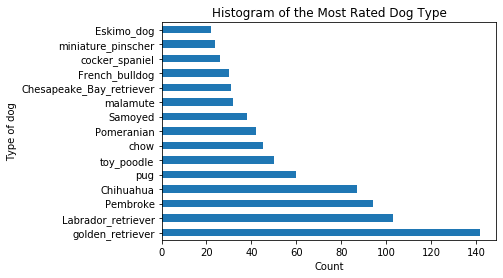

In [2044]:
#Plot top 15 dogs who got appears most often
df_dog_type=df_twitter['dog_type'].value_counts()[0:15]
df_dog_type.plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output1.png',bbox_inches='tight');

In [2045]:
df_twitter.loc[df_twitter.dog_type=="golden_retriever",'jpg_url']

13      https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
15      https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
16      https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
35      https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
37      https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg
                             ...                       
1573    https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg
1580    https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg
1605    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg
1615    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
1617    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
Name: jpg_url, Length: 142, dtype: object

<center>This is Golden_retriever!</center>
<img align="center" width="300" height="200" src="https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg">

In [2046]:
#group by dog type and get average values 
df_dog_type_mean = df_twitter.groupby('dog_type').mean()
df_dog_type_mean.head()

,rating_numerator,rating_denominator,year,month,day,confidence,retweet_count,favorite_count,followers_count
dog_type,,,,,,,,,
Afghan_hound,8.000000,10.0,2016.500000,6.00,16.000000,0.513621,3004.000000,10761.000000,8969230.00
Airedale,9.833333,10.0,2015.583333,8.75,15.916667,0.583771,1173.666667,4662.583333,8969237.25
American_Staffordshire_terrier,10.312500,10.0,2016.187500,5.25,15.000000,0.527359,1733.466667,7467.466667,8969234.80
Appenzeller,11.000000,10.0,2016.500000,4.50,18.500000,0.503665,1205.500000,6484.000000,8969234.50
Australian_terrier,11.500000,10.0,2016.500000,3.50,7.000000,0.307584,2615.000000,9875.500000,8969235.00


In [2047]:
#sort by high rating averages
df_dog_type_sorted = df_dog_type_mean['rating_numerator'].sort_values(ascending=False)
df_dog_type_sorted

dog_type
Bouvier_des_Flandres           13.000000
Saluki                         12.500000
briard                         12.333333
Irish_setter                   12.333333
Border_terrier                 12.142857
                                 ...    
Scotch_terrier                  9.000000
Walker_hound                    9.000000
soft-coated_wheaten_terrier     8.800000
Afghan_hound                    8.000000
Japanese_spaniel                5.000000
Name: rating_numerator, Length: 113, dtype: float64

In [2048]:
df_twitter.loc[df_twitter.dog_type == 'Bouvier_des_Flandres', 'jpg_url']
#df_twitter['jpg_url'][1074]

113    https://pbs.twimg.com/ext_tw_video_thumb/86128...
Name: jpg_url, dtype: object

<center>This is Bouvier_des_Flandres! Top rated dog type!</center>
<img align="center" width="300" height="300" src="https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg">


In [2049]:
df_twitter.loc[df_twitter.dog_type == 'Japanese_spaniel', 'jpg_url']

1214    https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg
Name: jpg_url, dtype: object

<center> This is Japanese_spaniel which got worst rating</center>
<img align="center" width="300" height="300" src="https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg">



In [2050]:
df_twitter[df_twitter['dog_type'] == 'golden_retriever']

,tweet_id,text,rating_numerator,rating_denominator,name,stage,year,month,day,jpg_url,dog_type,confidence,retweet_count,favorite_count,followers_count
13,889531135344209921,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,puppo,2017,7,24,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,1968.0,13807.0,8969230.0
15,888917238123831296,This is Jim. He found a fren. Taught him how t...,12.0,10.0,Jim,,2017,7,23,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,golden_retriever,0.714719,3916.0,26483.0,8969230.0
16,888804989199671297,This is Zeke. He has a new stick. Very proud o...,13.0,10.0,Zeke,,2017,7,22,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,golden_retriever,0.469760,3705.0,23246.0,8969230.0
35,883482846933004288,This is Bella. She hopes her smile made you sm...,13.5,10.0,Bella,,2017,7,8,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,8640.0,41659.0,8969231.0
37,883117836046086144,Please only send dogs. We don't rate mechanics...,13.0,10.0,None,,2017,7,7,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,golden_retriever,0.949562,5798.0,33717.0,8969231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,Bradlay,,2015,11,19,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351,55.0,233.0,8969241.0
1580,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,None,,2015,11,18,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266,44.0,174.0,8969241.0
1605,666345417576210432,Look at this jokester thinking seat belt laws ...,10.0,10.0,None,,2015,11,16,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.858744,128.0,266.0,8969240.0
1615,666063827256086533,This is the happiest dog you will ever see. Ve...,10.0,10.0,the,,2015,11,16,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.775930,188.0,433.0,8969240.0


### 5.2 Any bias in number of dog types?

While golden retriever got most number of ratings,it was not top rated dog type. I looked at which are the top ones but most of them were which I have no heard of. 
So here I will check both counting and rating.


In [2051]:

dog_type_count = df_twitter.groupby('dog_type')['rating_numerator'].count()
dog_type_mean = df_twitter.groupby('dog_type')['rating_numerator'].mean()
df_dog_type=pd.DataFrame()
df_dog_type['mean']=dog_type_mean 
df_dog_type['count']=dog_type_count

df_dog_type

,mean,count
dog_type,,
Afghan_hound,8.000000,2
Airedale,9.833333,12
American_Staffordshire_terrier,10.312500,16
Appenzeller,11.000000,2
Australian_terrier,11.500000,2
...,...,...
toy_poodle,11.020000,50
toy_terrier,10.333333,3
vizsla,10.846154,13


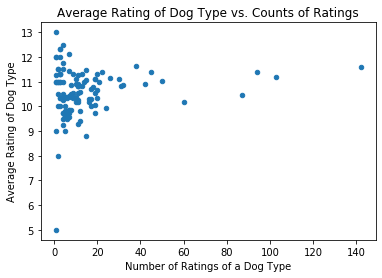

In [2052]:
df_dog_type.plot(x='count', y='mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type vs. Counts of Ratings');
fig.savefig('output2.png',bbox_inches='tight');

Golden Retriever lies on top right corner which represent it is favored dog the by large number.

### 5.3 Reteweet counts vs. rating
Here I checked the relationship between retweet counts and ratings. As expected, high reetweet counts also got high ratings.

In [2053]:
print(df_twitter.dog_type[df_twitter.retweet_count.idxmax()])
df_twitter.jpg_url[df_twitter.retweet_count.idxmax()]

Labrador_retriever


'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

<center>The most retweeted dog!</most>
<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' height=300, width=300>


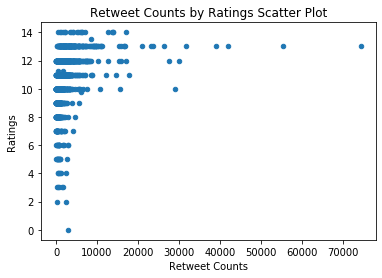

In [2054]:
df_twitter.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot');
fig.savefig('output3.png',bbox_inches='tight');

### 5.4 Favorite Count vs. Rating

In [2055]:
print(df_twitter.dog_type[df_twitter.favorite_count.idxmax()])
df_twitter.jpg_url[df_twitter.favorite_count.idxmax()]

Labrador_retriever


'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

<center>The dog with most favorite count! Yes, This is the same dog above!</center>
<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' height=300, width=300>

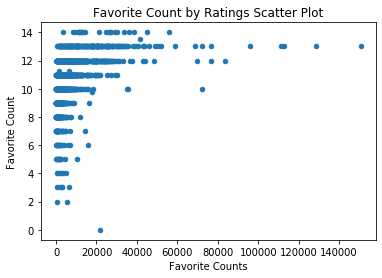

In [2056]:
df_twitter.plot(x='favorite_count', y='rating_numerator', kind='scatter')
plt.xlabel('Favorite Counts')
plt.ylabel('Favorite Count')
plt.title('Favorite Count by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output4.png',bbox_inches='tight');

### 5.5 Ratings by Dog Stages

In [2057]:
'''
ratings_by_stage=[df_twitter.groupby('doggo')['rating_numerator'].mean()[1],
df_twitter.groupby('floofer')['rating_numerator'].mean()[1],
df_twitter.groupby('pupper')['rating_numerator'].mean()[1],
df_twitter.groupby('puppo')['rating_numerator'].mean()[1]]
ratings_by_stage
'''
ratings_by_stage=df_twitter.groupby('stage')['rating_numerator'].mean()
ratings_by_stage.index[1:]


Index(['doggo', 'doggo,floofer', 'doggo,pupper', 'doggo,puppo', 'floofer',
       'pupper', 'puppo'],
      dtype='object', name='stage')

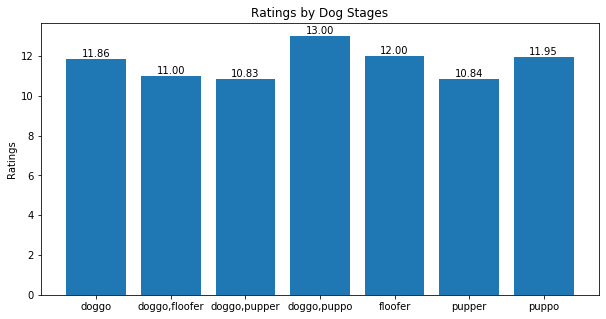

In [2058]:
names=ratings_by_stage.index[1:]
plt.figure(figsize=(10,5))
plt.bar(names,ratings_by_stage[1:])
plt.title('Ratings by Dog Stages')
plt.ylabel('Ratings')
for x,y in zip(names,ratings_by_stage[1:]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()
fig.savefig('output5.png',bbox_inches='tight');